In [1]:
from epydemix import EpiModel
from epydemix.utils import compute_days, compute_simulation_dates
from epydemix.visualization import plot_quantiles
from models.stochastic_seir_population import StochasticSEIRAgeGroups
from models.stochastic_sir_population import StochasticSIRAgeGroups
from models.stochastic_sis_population import StochasticSISAgeGroups
import matplotlib.pyplot as plt 
import numpy as np

start_date = '2020-01-01'
end_date = '2020-08-30'
n_days = compute_days(start_date, end_date)
dates = compute_simulation_dates(start_date, end_date)

# SIR Model

In [2]:
epydemix_sir = EpiModel(compartments=['S', 'I', 'R'], 
                         parameters={'beta': 0.015, 'gamma': 0.1}) 

epydemix_sir.add_transition("S", "I", agent="I", rate="beta")
epydemix_sir.add_transition("I", "R", rate="gamma")

epydemix_sir.import_epydemix_population(population_name="United_Kingdom", 
                                        age_group_mapping={"0-9": ["0-4", "5-9"],
                                                         "10-19": ["10-14", "15-19"],
                                                         "20-29": ["20-24", "25-29"],
                                                         "30-39": ["30-34", "35-39"],
                                                         "40-49": ["40-44", "45-49"],
                                                         "50-59": ["50-54", "55-59"],
                                                         "60-69": ["60-64", "65-69"],
                                                         "70+": ["70-74", "75+"]},
                                      contacts_source="prem_2021")

n_age = epydemix_sir.population.Nk.shape[0]
initial_conditions = {'S': epydemix_sir.population.Nk - 10 * np.ones(n_age),
                      'I': 10 * np.ones(n_age),
                      'R': 0 * np.ones(n_age)}

results_epydemix_sir = epydemix_sir.run_simulations(start_date=start_date, 
                                                    end_date=end_date, 
                                                    initial_conditions_dict=initial_conditions,
                                                    Nsim=100)

In [3]:
C = epydemix_sir.population.contact_matrices['school'] + \
epydemix_sir.population.contact_matrices['work'] + \
epydemix_sir.population.contact_matrices['community'] + \
epydemix_sir.population.contact_matrices['home']


stochastic_sir_population = StochasticSIRAgeGroups(
    S0=initial_conditions['S'].astype(int),
    I0=initial_conditions['I'].astype(int),
    R0=initial_conditions['R'].astype(int),
    beta=0.015,
    gamma=0.1,
    contact_matrix=C,
    population=epydemix_sir.population.Nk.astype(int),
    time_steps=n_days)

results_stochastic_sir_population = stochastic_sir_population.run_simulations(Nsim=100, quantiles=[0.05, 0.5, 0.95])

/var/folders/5q/w1ww7ss174bb2jxkr7jkj3rw0000gp/T/ipykernel_22789/1726502759.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


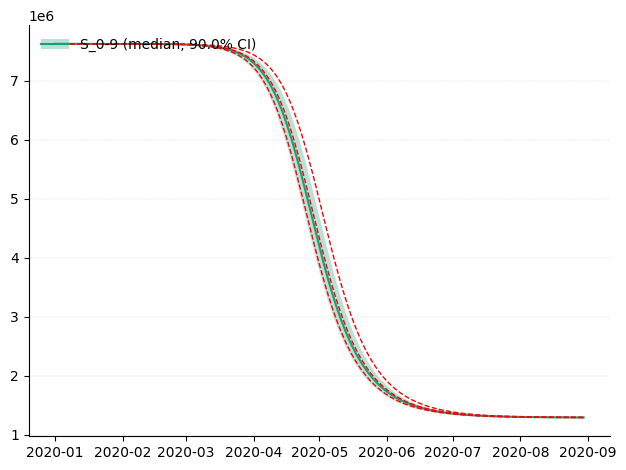

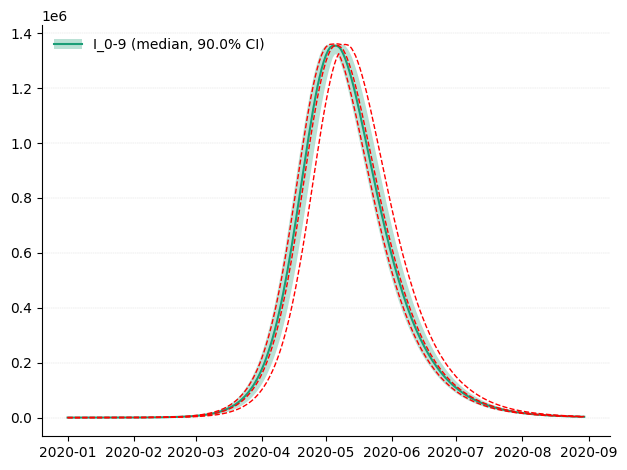

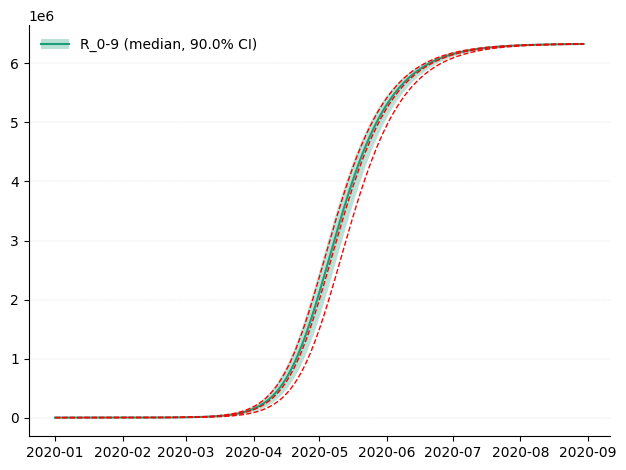

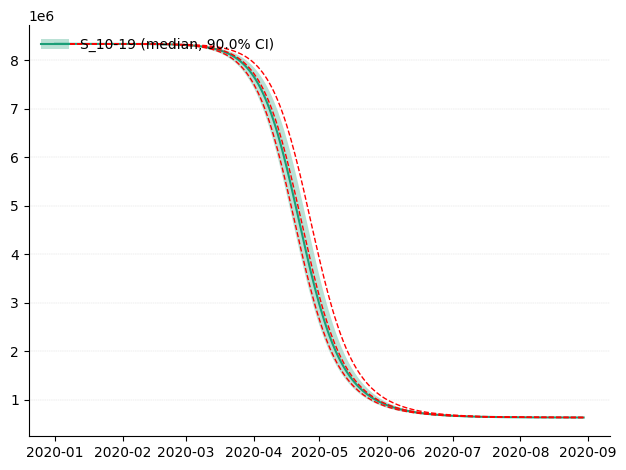

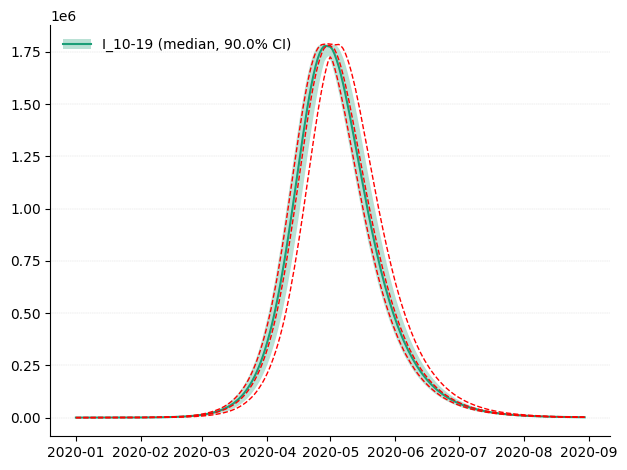

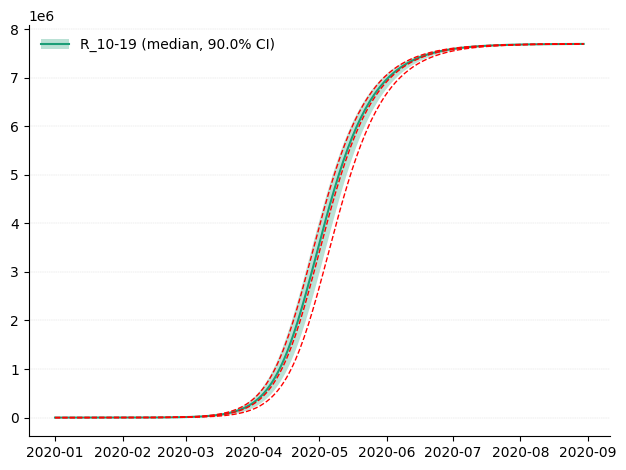

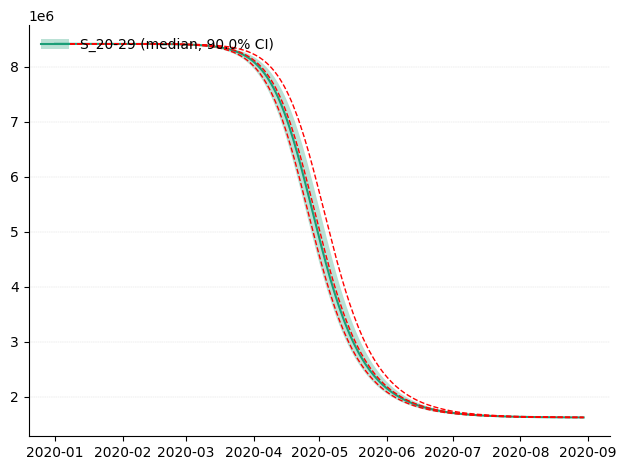

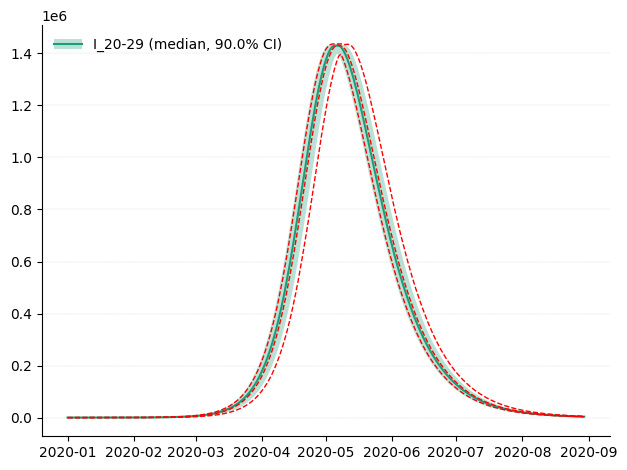

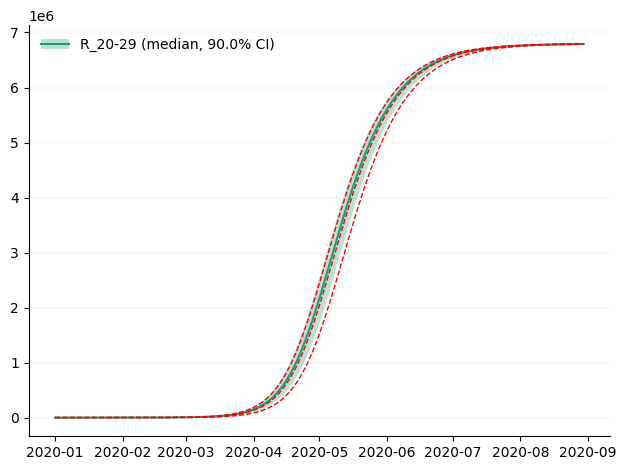

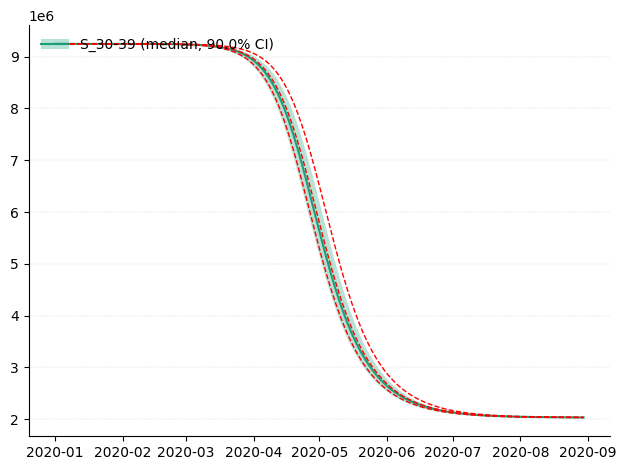

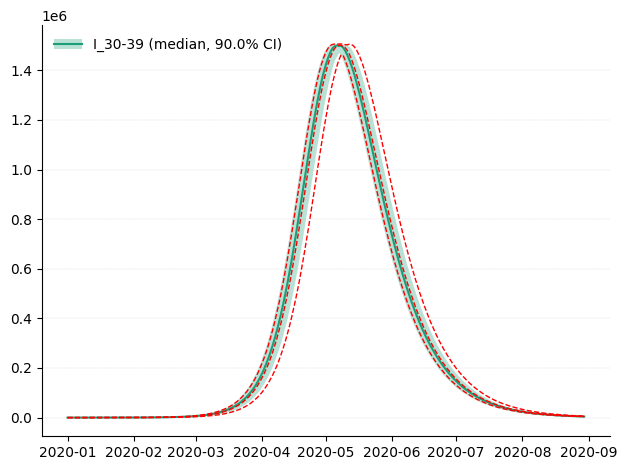

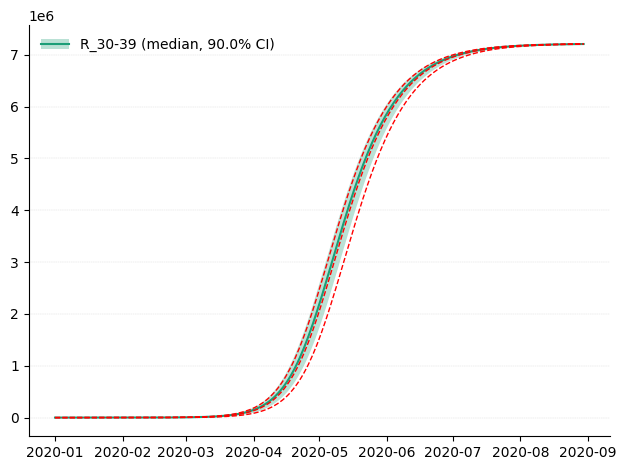

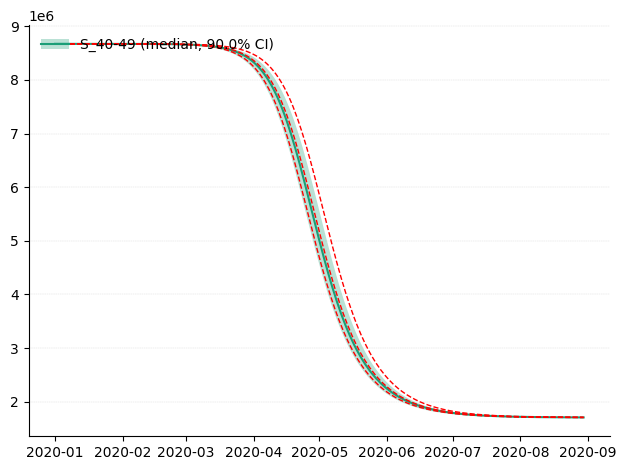

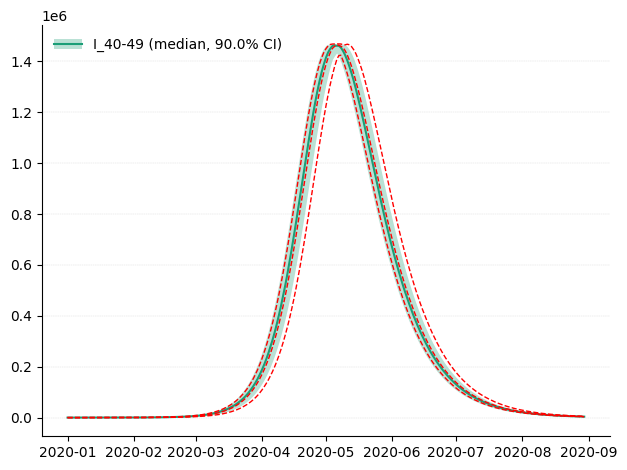

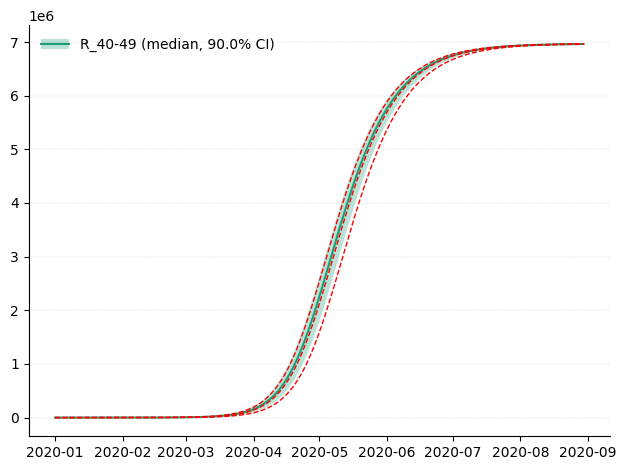

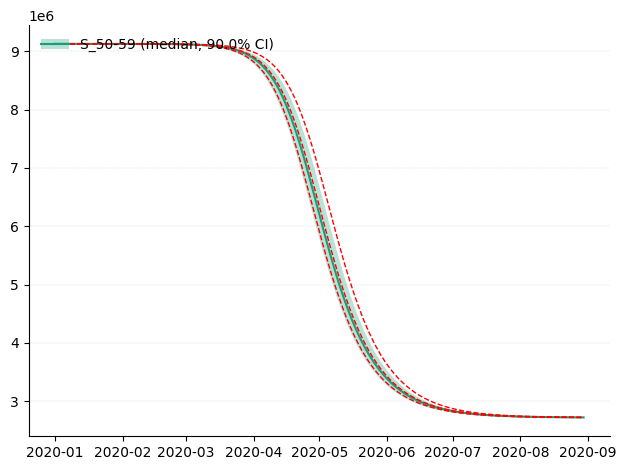

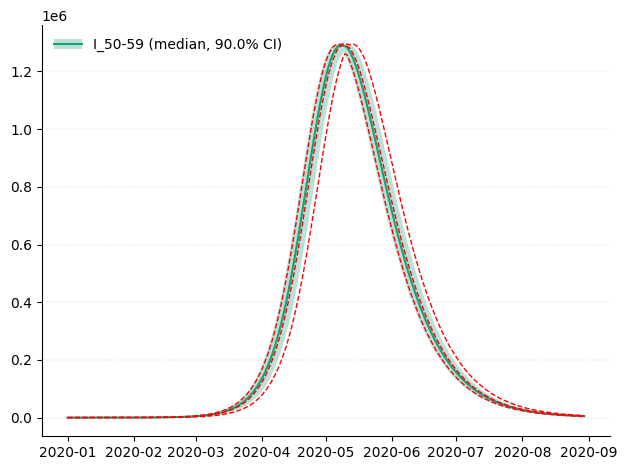

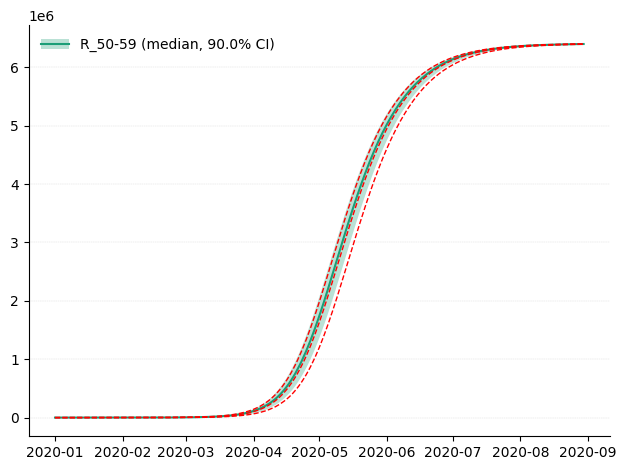

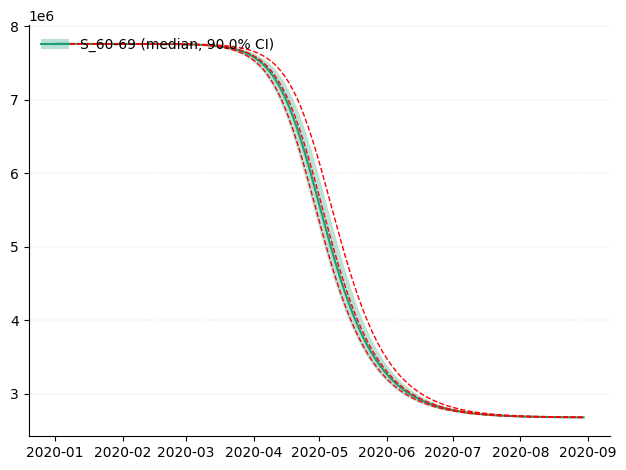

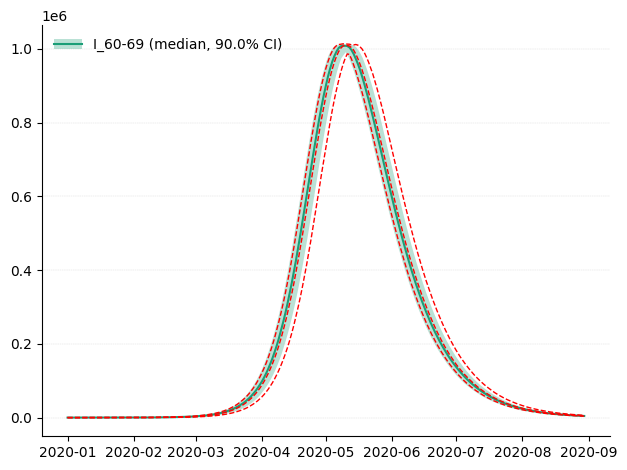

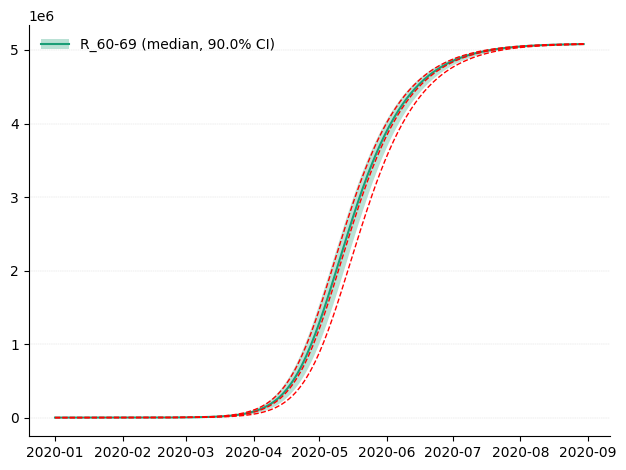

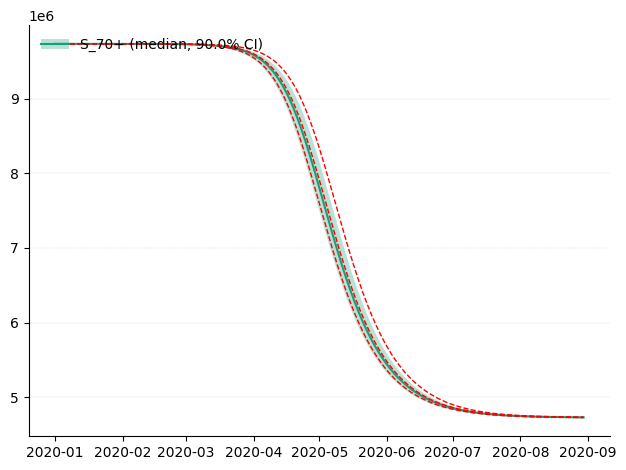

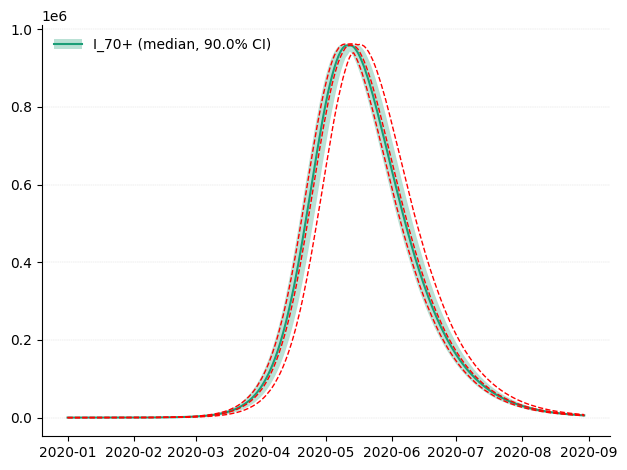

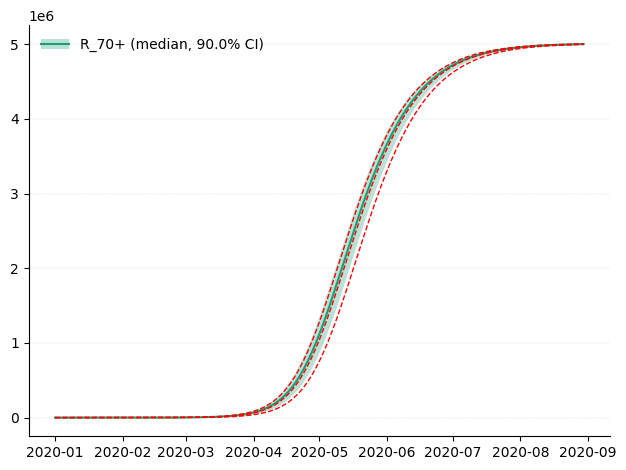

In [4]:
for i, age_grp in enumerate(epydemix_sir.population.Nk_names):
    for comp in ['S', 'I', 'R']:
        fig, ax = plt.subplots()
        plot_quantiles(results_epydemix_sir.get_quantiles_compartments(), columns=[f"{comp}_{age_grp}"], ax=ax)
        ax.plot(dates, results_stochastic_sir_population[comp][0.5][:, i], 
                linestyle='--', color='red', linewidth=1)
        
        ax.plot(dates, results_stochastic_sir_population[comp][0.05][:, i], 
                linestyle='--', color='red', linewidth=1)
        
        ax.plot(dates, results_stochastic_sir_population[comp][0.95][:, i], 
                linestyle='--', color='red', linewidth=1)

# SEIR Model

In [5]:
epydemix_seir = EpiModel(compartments=['S', 'E', 'I', 'R'], 
                         parameters={'beta': 0.035, 'gamma': 0.1, 'sigma': 0.1}) 

epydemix_seir.add_transition("S", "E", agent="I", rate="beta")
epydemix_seir.add_transition("E", "I", rate="sigma")
epydemix_seir.add_transition("I", "R", rate="gamma")

epydemix_seir.import_epydemix_population(population_name="Philippines")

n_age = epydemix_seir.population.Nk.shape[0]
initial_conditions = {'S': epydemix_seir.population.Nk - 10 * np.ones(n_age),
                      'E': 5 * np.ones(n_age),
                      'I': 5 * np.ones(n_age),
                      'R': 0 * np.ones(n_age)}

results_epydemix_seir = epydemix_seir.run_simulations(start_date=start_date, 
                                                      end_date=end_date, 
                                                      initial_conditions_dict=initial_conditions,
                                                      Nsim=100)

In [6]:
C = epydemix_seir.population.contact_matrices['school'] + \
epydemix_seir.population.contact_matrices['work'] + \
epydemix_seir.population.contact_matrices['community'] + \
epydemix_seir.population.contact_matrices['home']


stochastic_seir_population = StochasticSEIRAgeGroups(
    S0=initial_conditions['S'].astype(int),
    E0=initial_conditions['E'].astype(int),
    I0=initial_conditions['I'].astype(int),
    R0=initial_conditions['R'].astype(int),
    beta=0.035,
    sigma=0.1,
    gamma=0.1,
    contact_matrix=C,
    population=epydemix_seir.population.Nk.astype(int),
    time_steps=n_days)

results_stochastic_seir_population = stochastic_seir_population.run_simulations(Nsim=100, quantiles=[0.05, 0.5, 0.95])

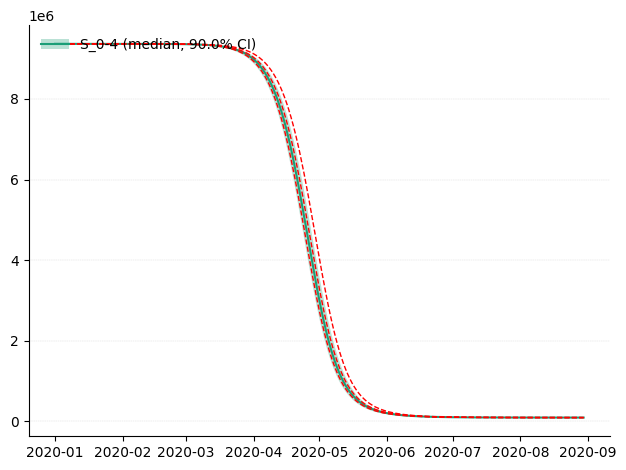

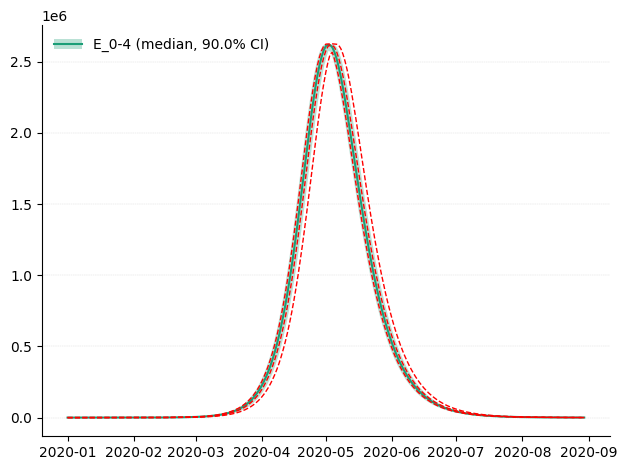

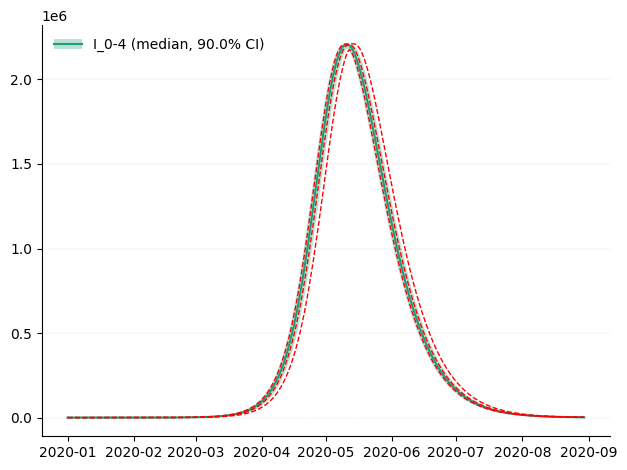

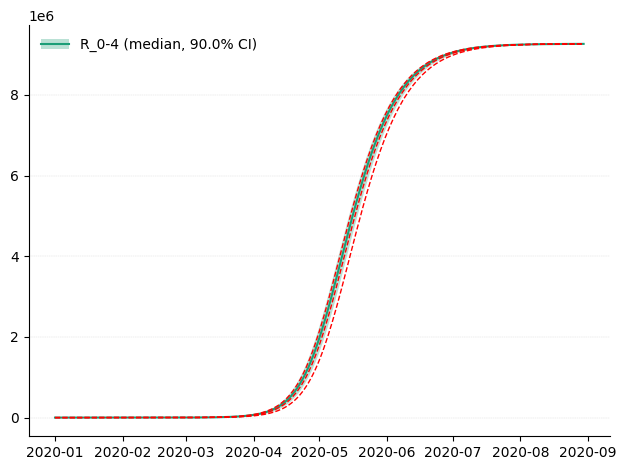

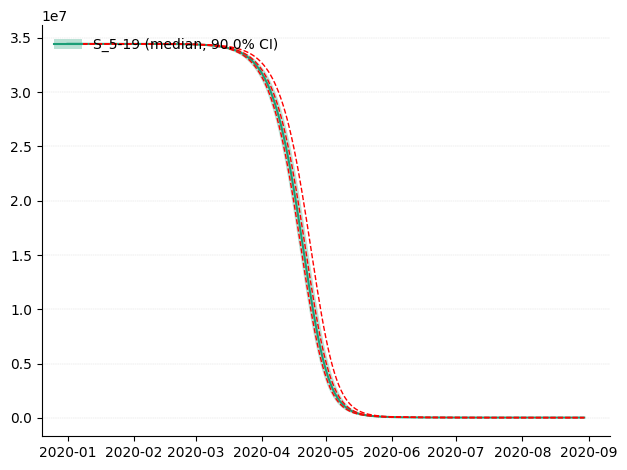

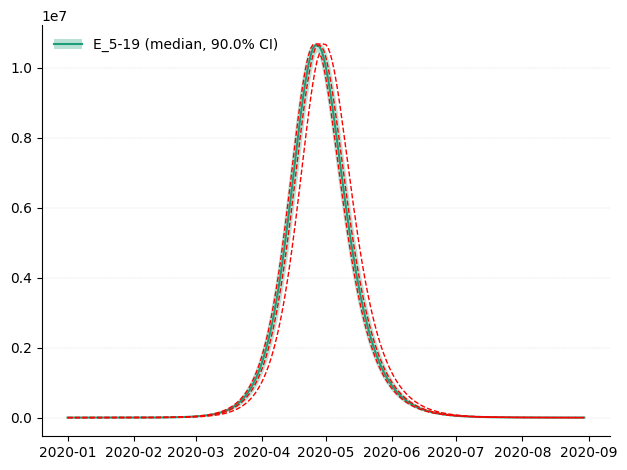

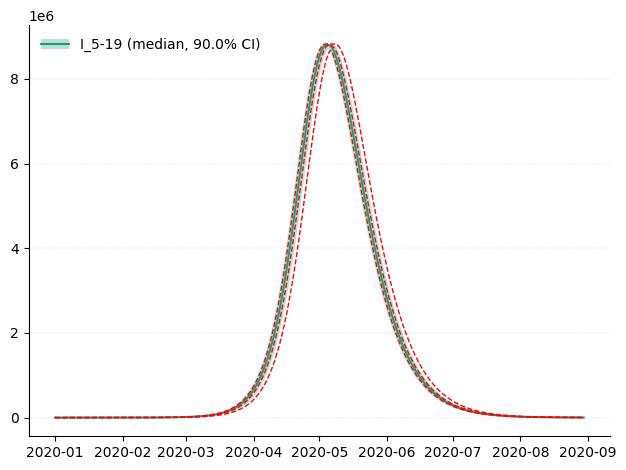

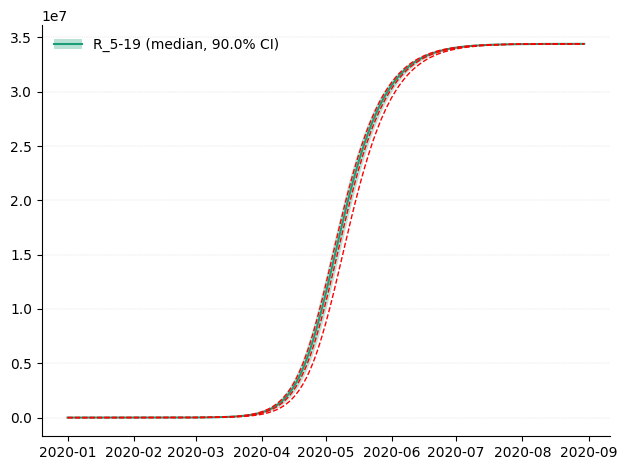

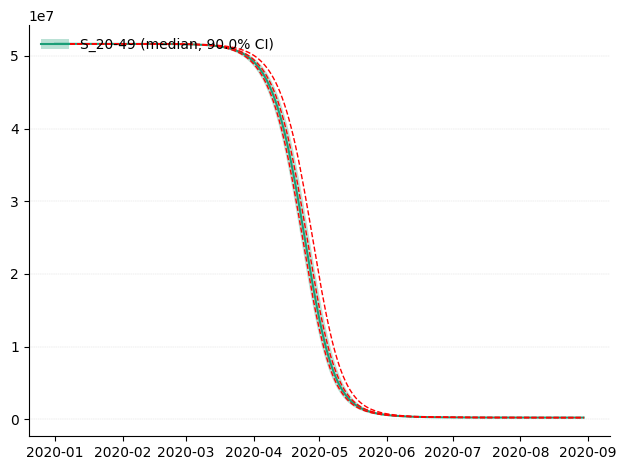

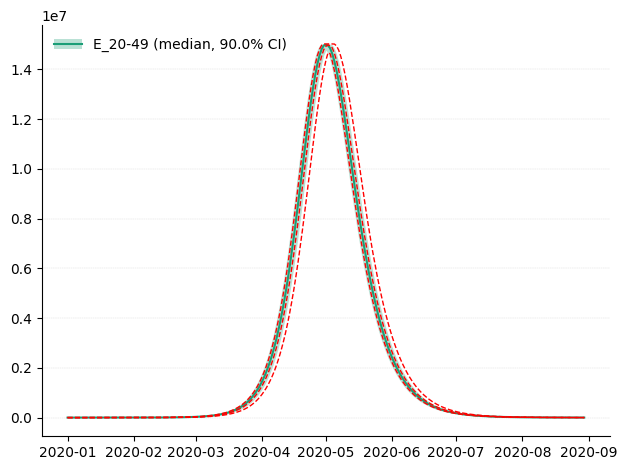

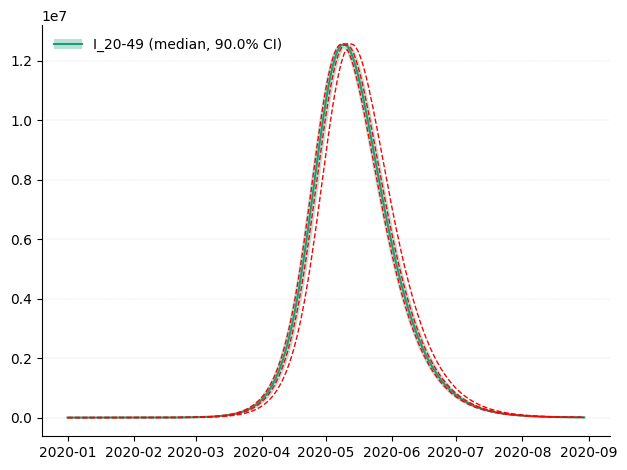

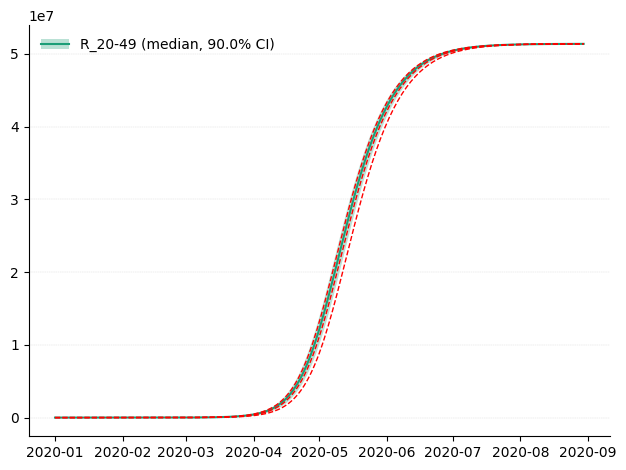

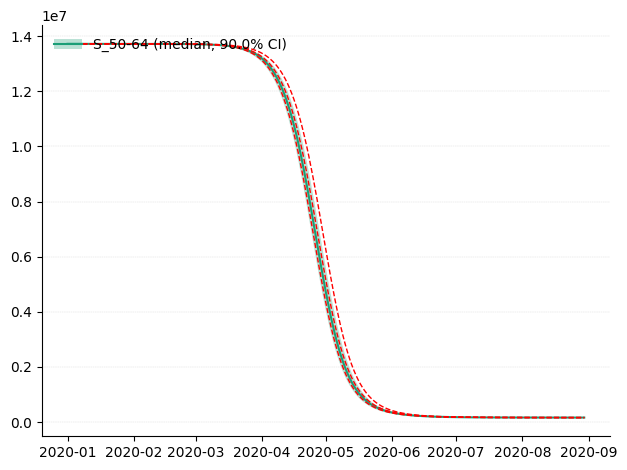

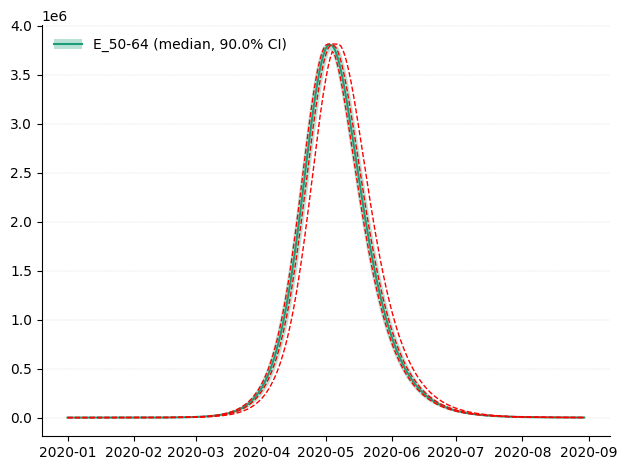

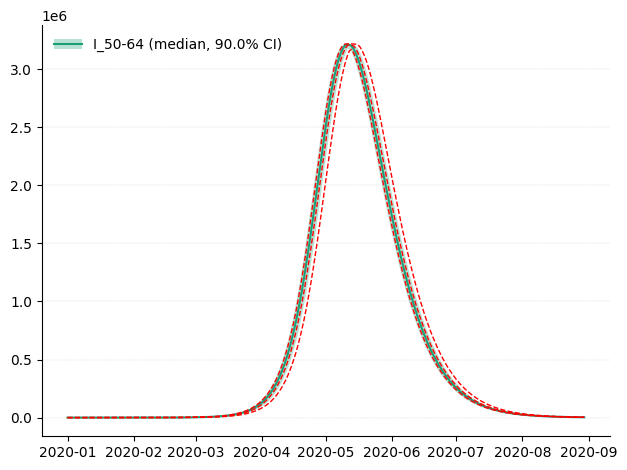

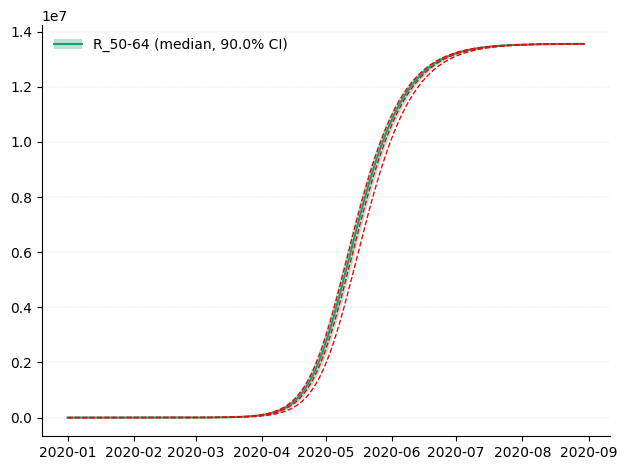

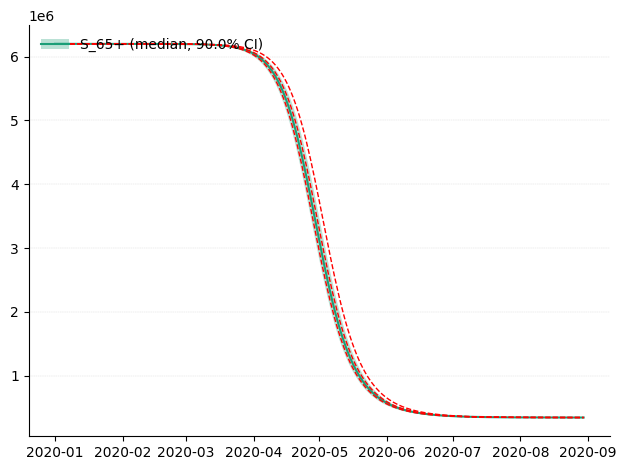

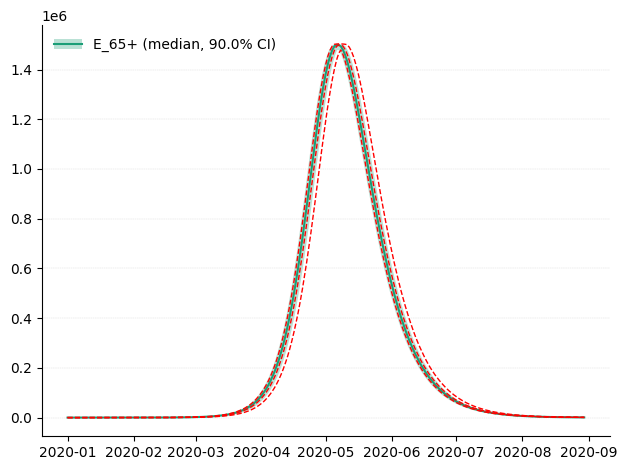

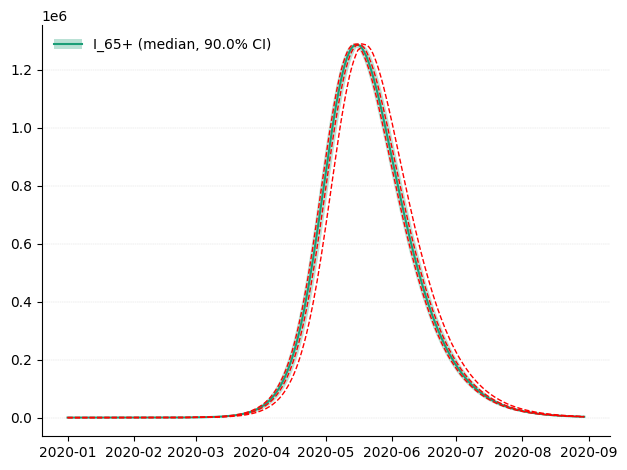

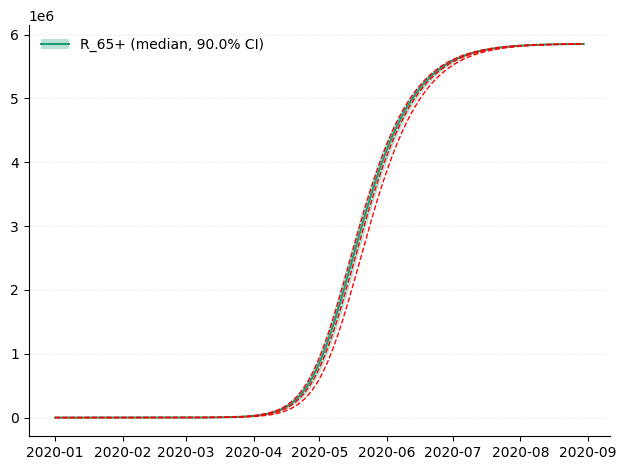

In [7]:
for i, age_grp in enumerate(epydemix_seir.population.Nk_names):
    for comp in ['S', 'E', 'I', 'R']:
        fig, ax = plt.subplots()
        plot_quantiles(results_epydemix_seir.get_quantiles_compartments(), columns=[f"{comp}_{age_grp}"], ax=ax)
        ax.plot(dates, results_stochastic_seir_population[comp][0.5][:, i], 
                linestyle='--', color='red', linewidth=1)
        
        ax.plot(dates, results_stochastic_seir_population[comp][0.05][:, i], 
                linestyle='--', color='red', linewidth=1)
        
        ax.plot(dates, results_stochastic_seir_population[comp][0.95][:, i], 
                linestyle='--', color='red', linewidth=1)

# SIS Model

In [8]:
epydemix_sis = EpiModel(predefined_model="SIS",
                        transmission_rate=0.015,
                        recovery_rate=0.1)
epydemix_sis.import_epydemix_population(population_name="United_States_Ohio")

n_age = epydemix_sis.population.Nk.shape[0]
initial_conditions = {'Susceptible': epydemix_sis.population.Nk - 10 * np.ones(n_age),
                      'Infected': 10 * np.ones(n_age)}

results_epydemix_sis = epydemix_sis.run_simulations(start_date=start_date, 
                                                      end_date=end_date, 
                                                      initial_conditions_dict=initial_conditions,
                                                      Nsim=100)

In [9]:
C = epydemix_sis.population.contact_matrices['school'] + \
epydemix_sis.population.contact_matrices['work'] + \
epydemix_sis.population.contact_matrices['community'] + \
epydemix_sis.population.contact_matrices['home']


stochastic_sis_population = StochasticSISAgeGroups(
    S0=initial_conditions['Susceptible'].astype(int),
    I0=initial_conditions['Infected'].astype(int),
    beta=0.015,
    gamma=0.1,
    contact_matrix=C,
    population=epydemix_sis.population.Nk.astype(int),
    time_steps=n_days)

results_stochastic_sis_population = stochastic_sis_population.run_simulations(Nsim=100, quantiles=[0.05, 0.5, 0.95])

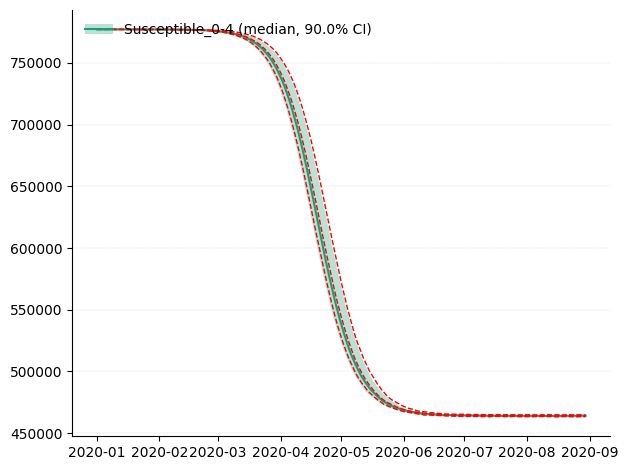

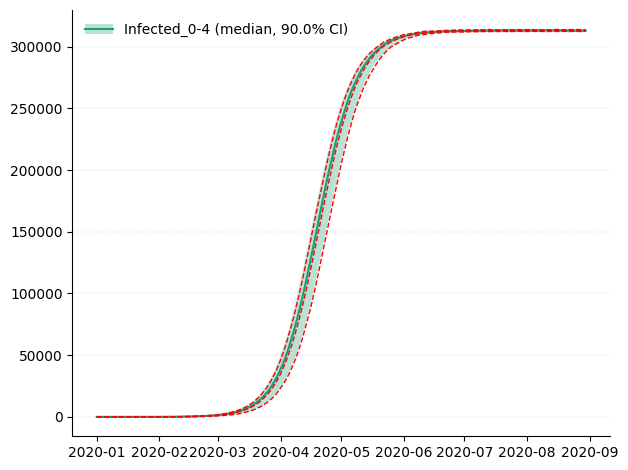

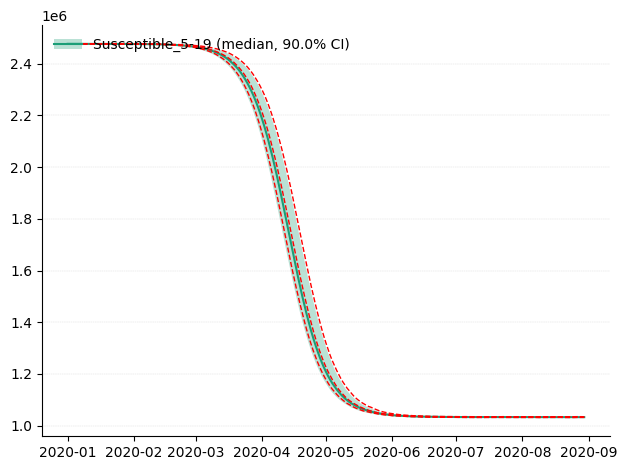

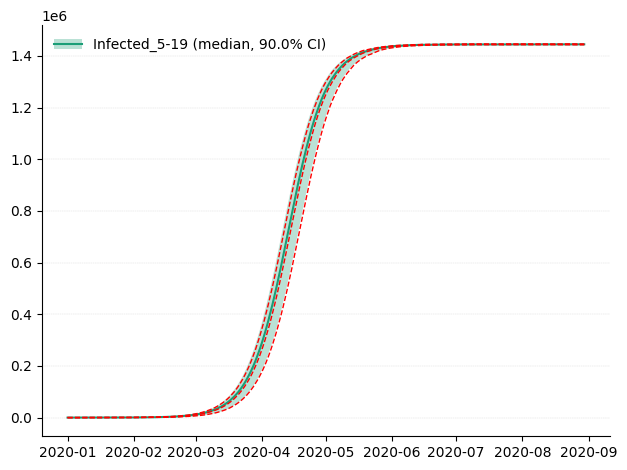

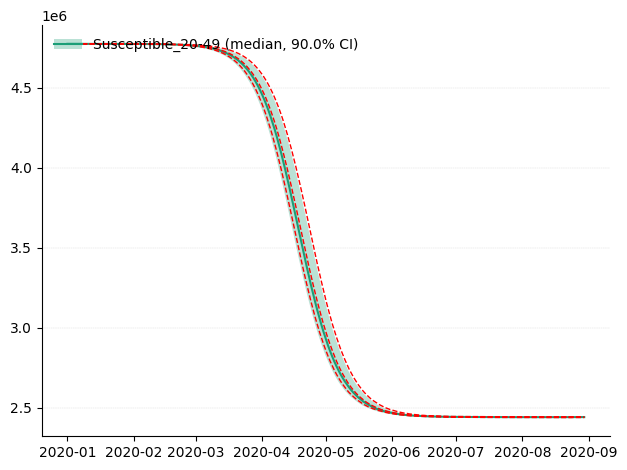

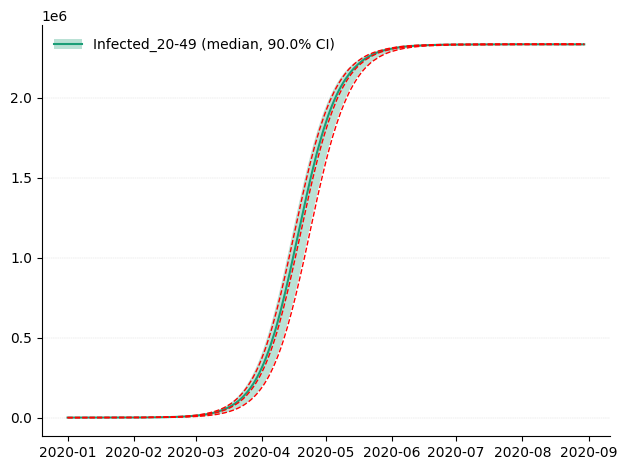

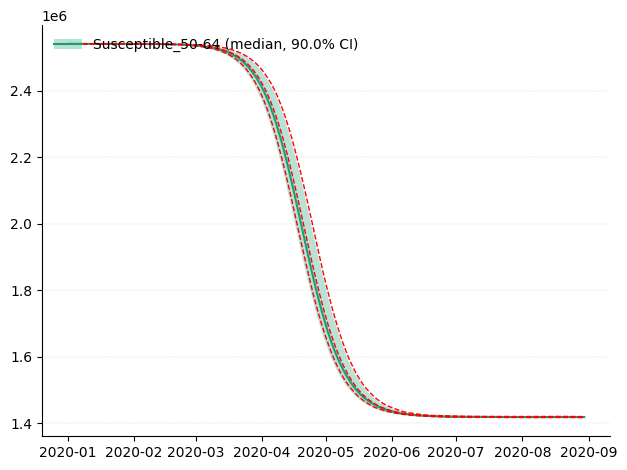

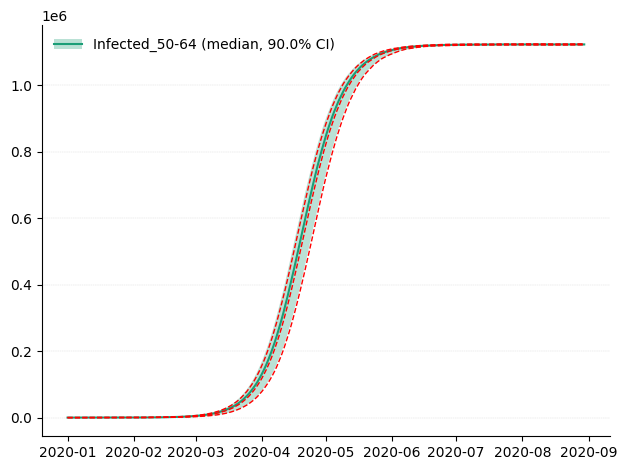

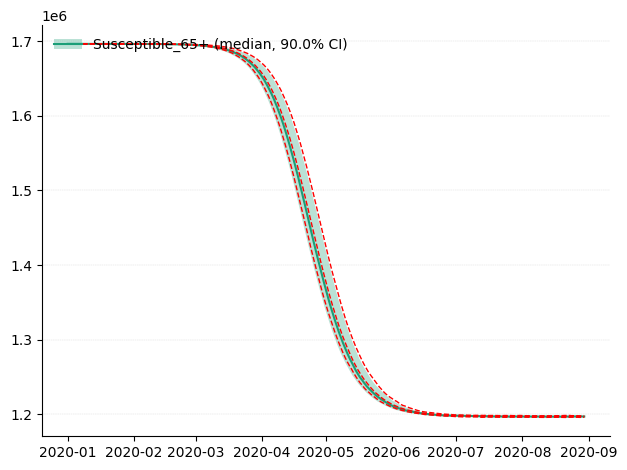

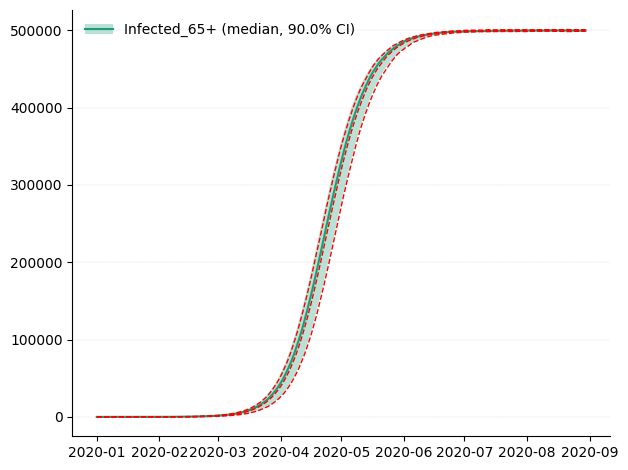

In [10]:
for i, age_grp in enumerate(epydemix_sis.population.Nk_names):
    for comp, comp_e in zip(['S', 'I'], ['Susceptible', 'Infected']):
        fig, ax = plt.subplots()
        plot_quantiles(results_epydemix_sis.get_quantiles_compartments(), columns=[f"{comp_e}_{age_grp}"], ax=ax)
        ax.plot(dates, results_stochastic_sis_population[comp][0.5][:, i], 
                linestyle='--', color='red', linewidth=1)
        
        ax.plot(dates, results_stochastic_sis_population[comp][0.05][:, i], 
                linestyle='--', color='red', linewidth=1)
        
        ax.plot(dates, results_stochastic_sis_population[comp][0.95][:, i], 
                linestyle='--', color='red', linewidth=1)